Business Context
-	We aim to help a financial services provider gain deeper insights into its credit card customer segments. By clustering customers based on their purchasing patterns and payment behaviors, this analysis provides actionable insights that allow the company to design more tailored products and services. This targeted approach to customer segmentation is expected to improve customer satisfaction, increase revenues, and optimize resource allocation for the company.
-	Understanding customer payment behavior is crucial for the company to manage financial risk effectively. Customers’ spending patterns can significantly influence their repayment behaviors; for instance, higher spending might increase the likelihood of defaults or partial payments, which poses a greater risk. Analyzing these behaviors enables the company to assess the credit risk associated with different customer segments. Customers who frequently make only minimum payments could represent a higher risk, as they may be more likely to accumulate debt. Identifying these high-risk customers early helps the company implement proactive risk mitigation strategies, such as offering financial counseling or restructuring payment plans.
-	By better understanding customers’ purchasing habits, the company can also create more effective marketing strategies, such as offering targeted rewards or credit card promotions to high-value customers. For this analysis, we focused on spending and payment behavior and selected 11 features from an original set of 18 to perform customer clustering. These features allow us to categorize customers based on behaviors for risk assessment, targeted marketing, and tailored financial product offerings.

-	Since we are now focusing on spending and payments areas, we extracted 11 features out of 18 features to process the customer clustering as a new data frame for further analysis.
  - Defined variables:
    - Spending patterns: ‘PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX'
    - 'Payment behaviors: 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'


Note: The explainations/interpretations of each element will be presented below the after the code results.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px


In [2]:
data = pd.read_csv('C:/Users/User/Desktop/Customer_Data.csv')

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Check number of unknowns
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#missing value in Minimum Payments fill in zero if payment is zero, otherwise with the mean of payments
data['MINIMUM_PAYMENTS'] = data.apply(
    lambda row: 0 if row['PAYMENTS'] == 0 else (data['PAYMENTS'].median() if pd.isnull(row['MINIMUM_PAYMENTS']) else row['MINIMUM_PAYMENTS']),
    axis=1
)

In [7]:
#missing value in credit_limit
data = data.dropna(subset=['CREDIT_LIMIT'])

In [8]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df1 = data[['PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

Data Cleaning
-	The missing values were checked in the dataset, with 313 missing values in MINIMUM_PAYMENTS and 1 missing in CREDIT_LIMIT. We used the imputation technique to solve 313 missing based on the definition of MINIMUM_PAYMENTS. If the PAYMENTS is zero, meaning the user did not make any payment, the MINIMUM_PAYMENTS should also be zero. For the rest of the missing values, we impute the median of PAYMENTS to it. Since there is only one missing value in the CREDIT_LIMIT, we just dropped the row for that.
- Extracted 11 related variables we defined for business context as a new data frame ‘df1’ for EDA and Modeling


Exploratory Data Analysis (EDA)

- Many features like PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CREDIT_LIMIT, MINIMUM_PAYMENTS, and PAYMENTS exhibit right-skewed distributions, which indicates most customers are in the lower value range. A very small number of users have extreme values in the features we selected.
  - From the purchasing features, most customers made low total/one-off purchases, and high spending/one-time purchases are rare. Installment purchases are uncommon or low for most customers, with occasional larger values. Most customers make relatively few transactions, while a few are more frequent buyers.
  - Most customers have relatively low credit limits below $10,000, and a few have high credit limits. This likely indicates that high limits are very small portions and likely reserved for specific, creditworthy customers.
  - MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, and PAYMENTS indicate that customers generally don’t carry large outstanding balances. Many customers rarely pay their full balance, possibly indicating a reliance on the credit. Most customers make smaller payments, but a few have made substantial payments, perhaps to reduce large balances.
- PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_TRX demonstrated that distinct groups of frequent and infrequent buyers, one-off purchases are generally infrequent, most customers rarely use installment options and majority of customers make relatively few transactions. At the same time, a small number of clients are more frequent purchasers.


- From the boxplots of extracted variables, it is very clear that most features (e.g., PURCHASES, ONEOFF_PURCHASES, CREDIT_LIMIT) have extreme outliers, indicating a small number of customers with extreme behaviors in these areas. The median also sits in the low-value area, suggesting that most customers exhibit low values for these metrics while a few have high values. The frequency features (PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY) show varying distributions, suggesting different buying behaviors among customers, from frequent to infrequent.
- In this dataset, the outliers represent high-value or atypical behaviors, such as very high spending or significant credit limits. These data points reflect real-world differences among customers, including those who may be exceptionally wealthy or have unique spending habits. In real-world scenarios, high-spending individuals or 'rich customers' are not uncommon and are often important to analyze separately, as they can represent valuable customer segments. Removing or modifying these outliers would potentially overlook a critical segment of customers who contribute significantly to overall revenue or have unique service needs. Therefore, to ensure our analysis reflects the full spectrum of customer behaviors, we have decided to retain these outliers in the dataset


- From the Heatmap of features correlation:
  - High Correlations: PURCHASES and ONEOFF_PURCHASES have a strong positive correlation (0.92), indicating that customers who spend more overall tend to make large one-time purchases. PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY are also highly correlated (0.86), suggesting that frequent buyers often use installment purchases.
  - Moderate Correlations: PURCHASES_TRX (number of transactions) shows moderate correlations with PURCHASES (0.69) and ONEOFF_PURCHASES (0.55), indicating that higher total purchase amounts are generally associated with more transactions. CREDIT_LIMIT has a moderate correlation with PAYMENTS (0.42), which suggests that customers with higher credit limits tend to make larger payments.
  - Low or Negligible Correlations: Features like MINIMUM_PAYMENTS and PRC_FULL_PAYMENT show very low correlations with most other variables, implying that they are relatively independent of other purchasing and credit behaviors.


In [10]:
df1.describe()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1003.316936,592.503572,411.113579,0.490405,0.202480,0.364478,14.711476,4494.449450,1733.336511,841.065069,0.153732
std,2136.727848,1659.968851,904.378205,0.401360,0.298345,0.397451,24.858552,3638.815725,2895.168146,2334.879763,0.292511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,39.800000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,1600.000000,383.282850,164.687639,0.000000
50%,361.490000,38.000000,89.000000,0.500000,0.083333,0.166667,7.000000,3000.000000,857.062706,299.935043,0.000000
75%,1110.170000,577.830000,468.650000,0.916667,0.300000,0.750000,17.000000,6500.000000,1901.279320,819.267218,0.142857
max,49039.570000,40761.250000,22500.000000,1.000000,1.000000,1.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


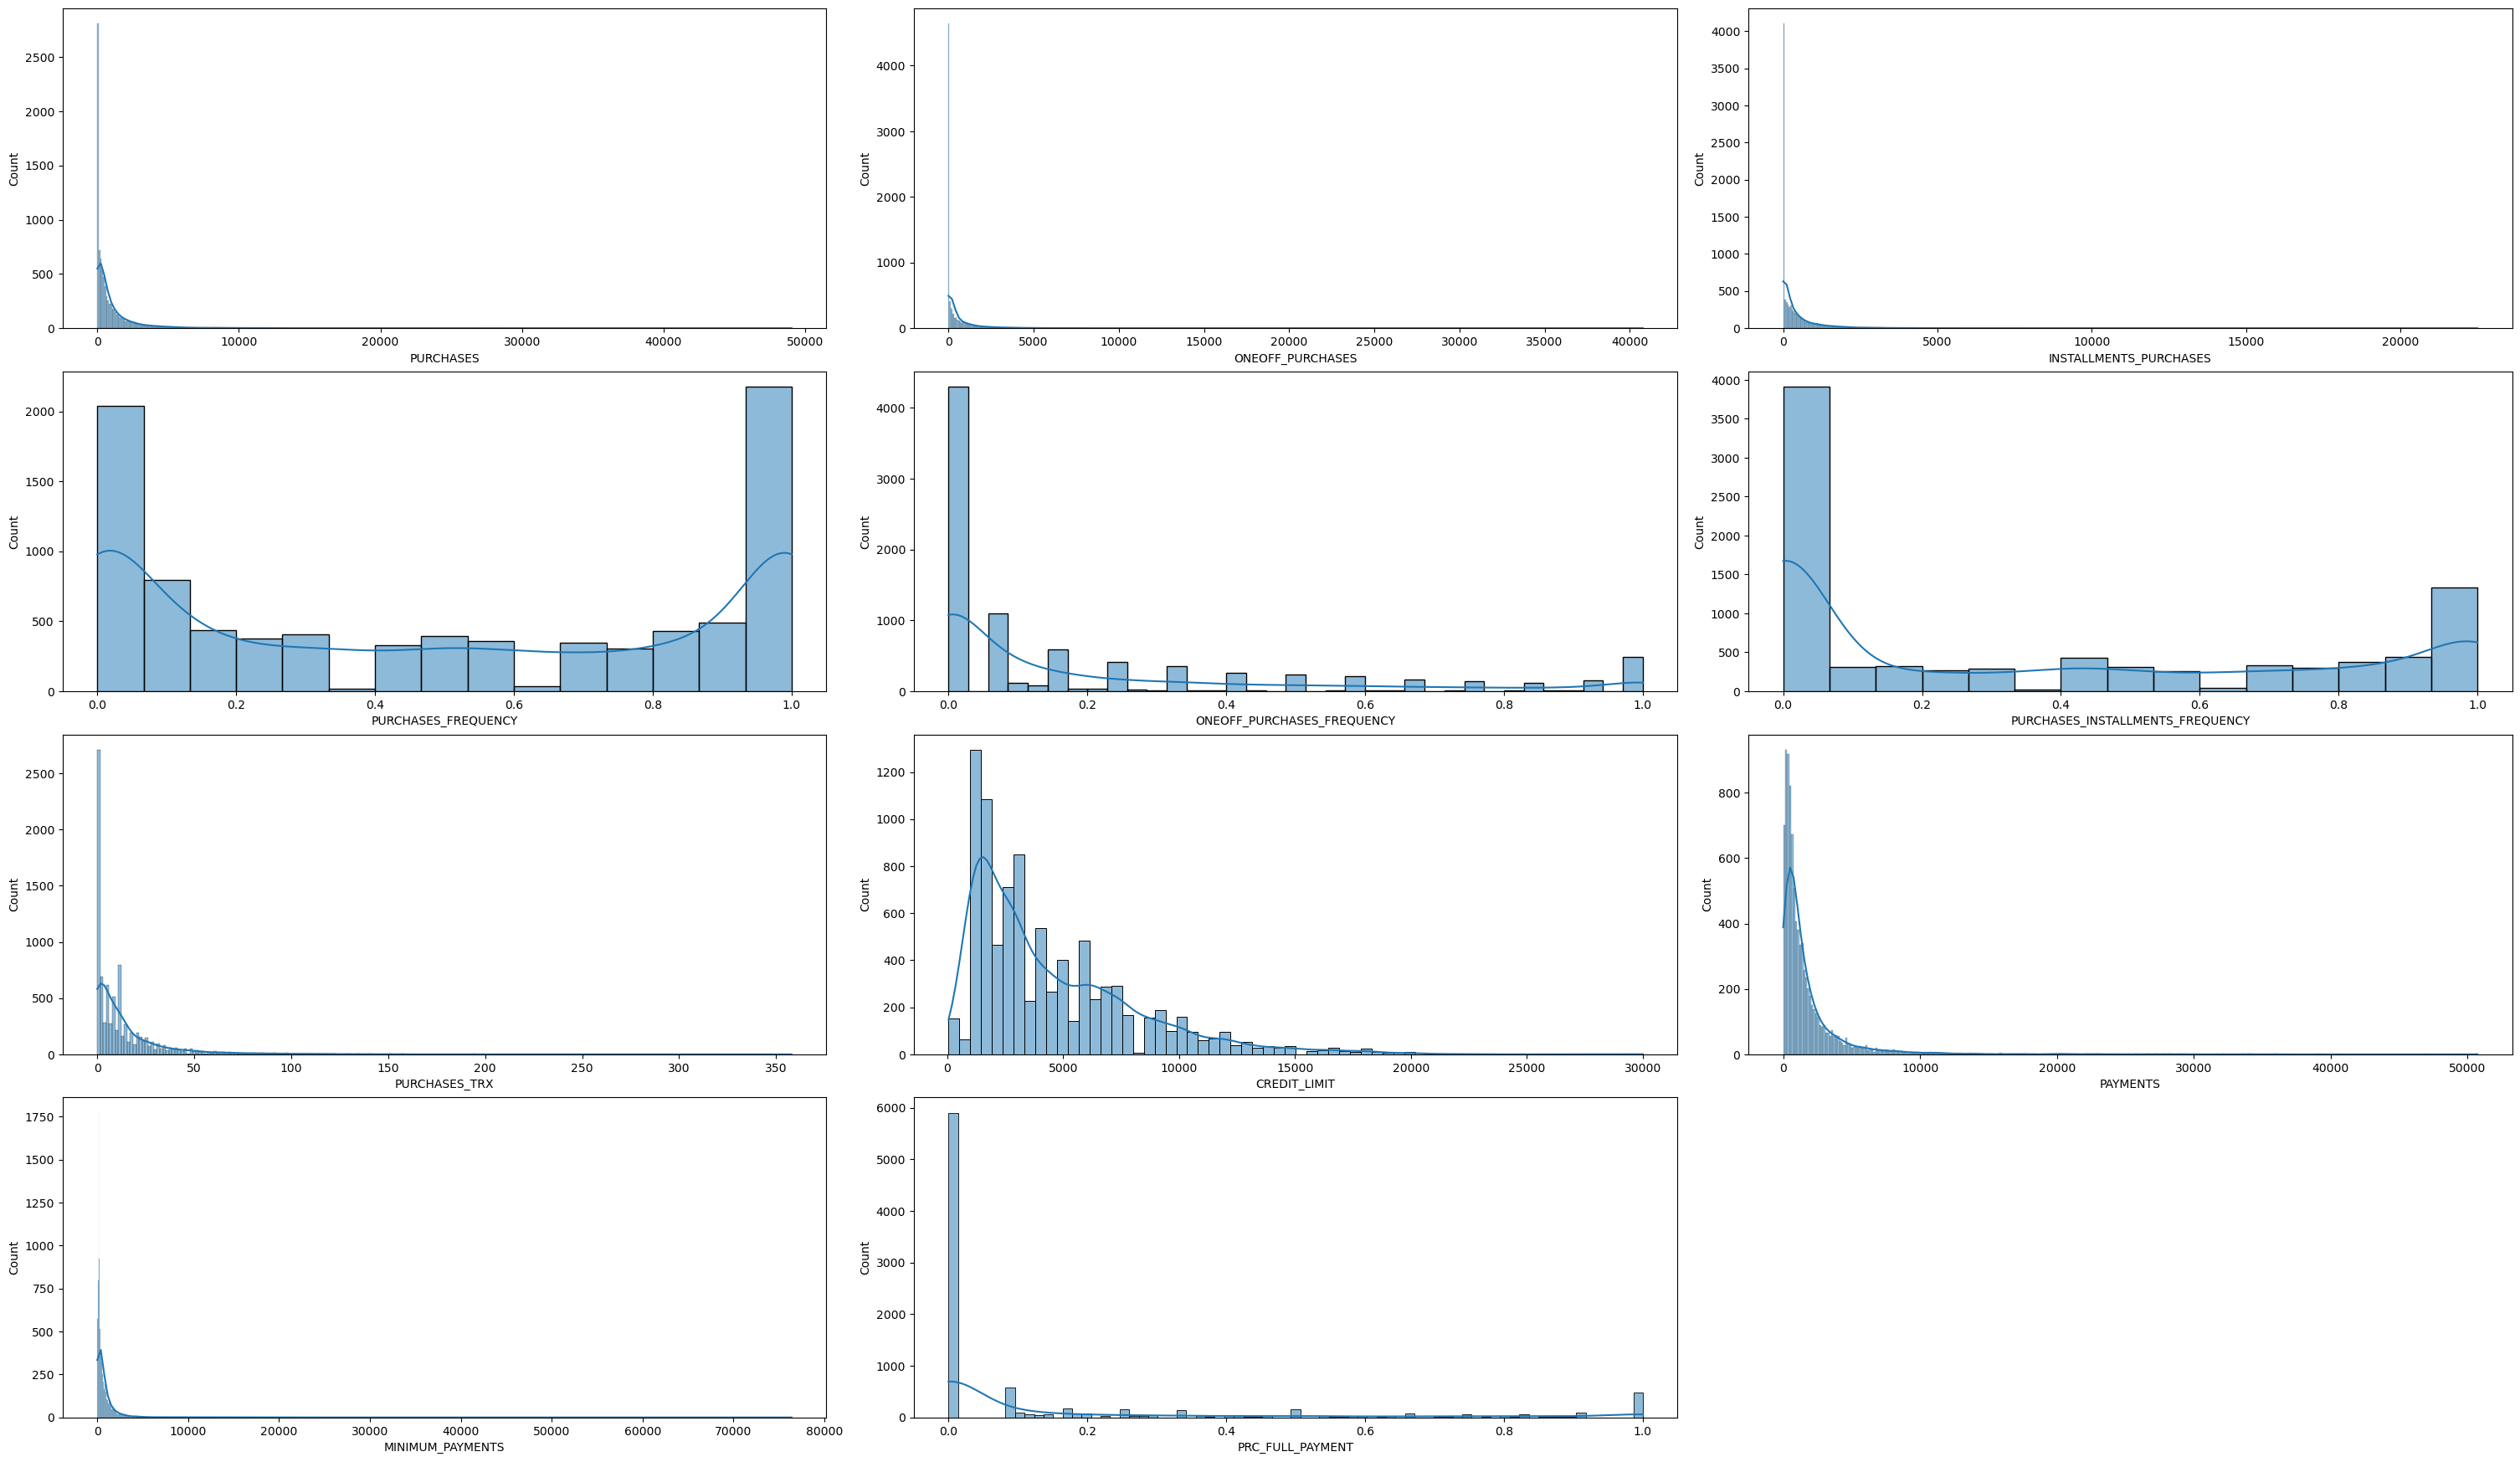

In [11]:
# creating distribution plot for analysis
fig = plt.figure(figsize=(30, 25), constrained_layout=True)
for i in range(len(df1.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df1[df1.columns[i]], kde=True)

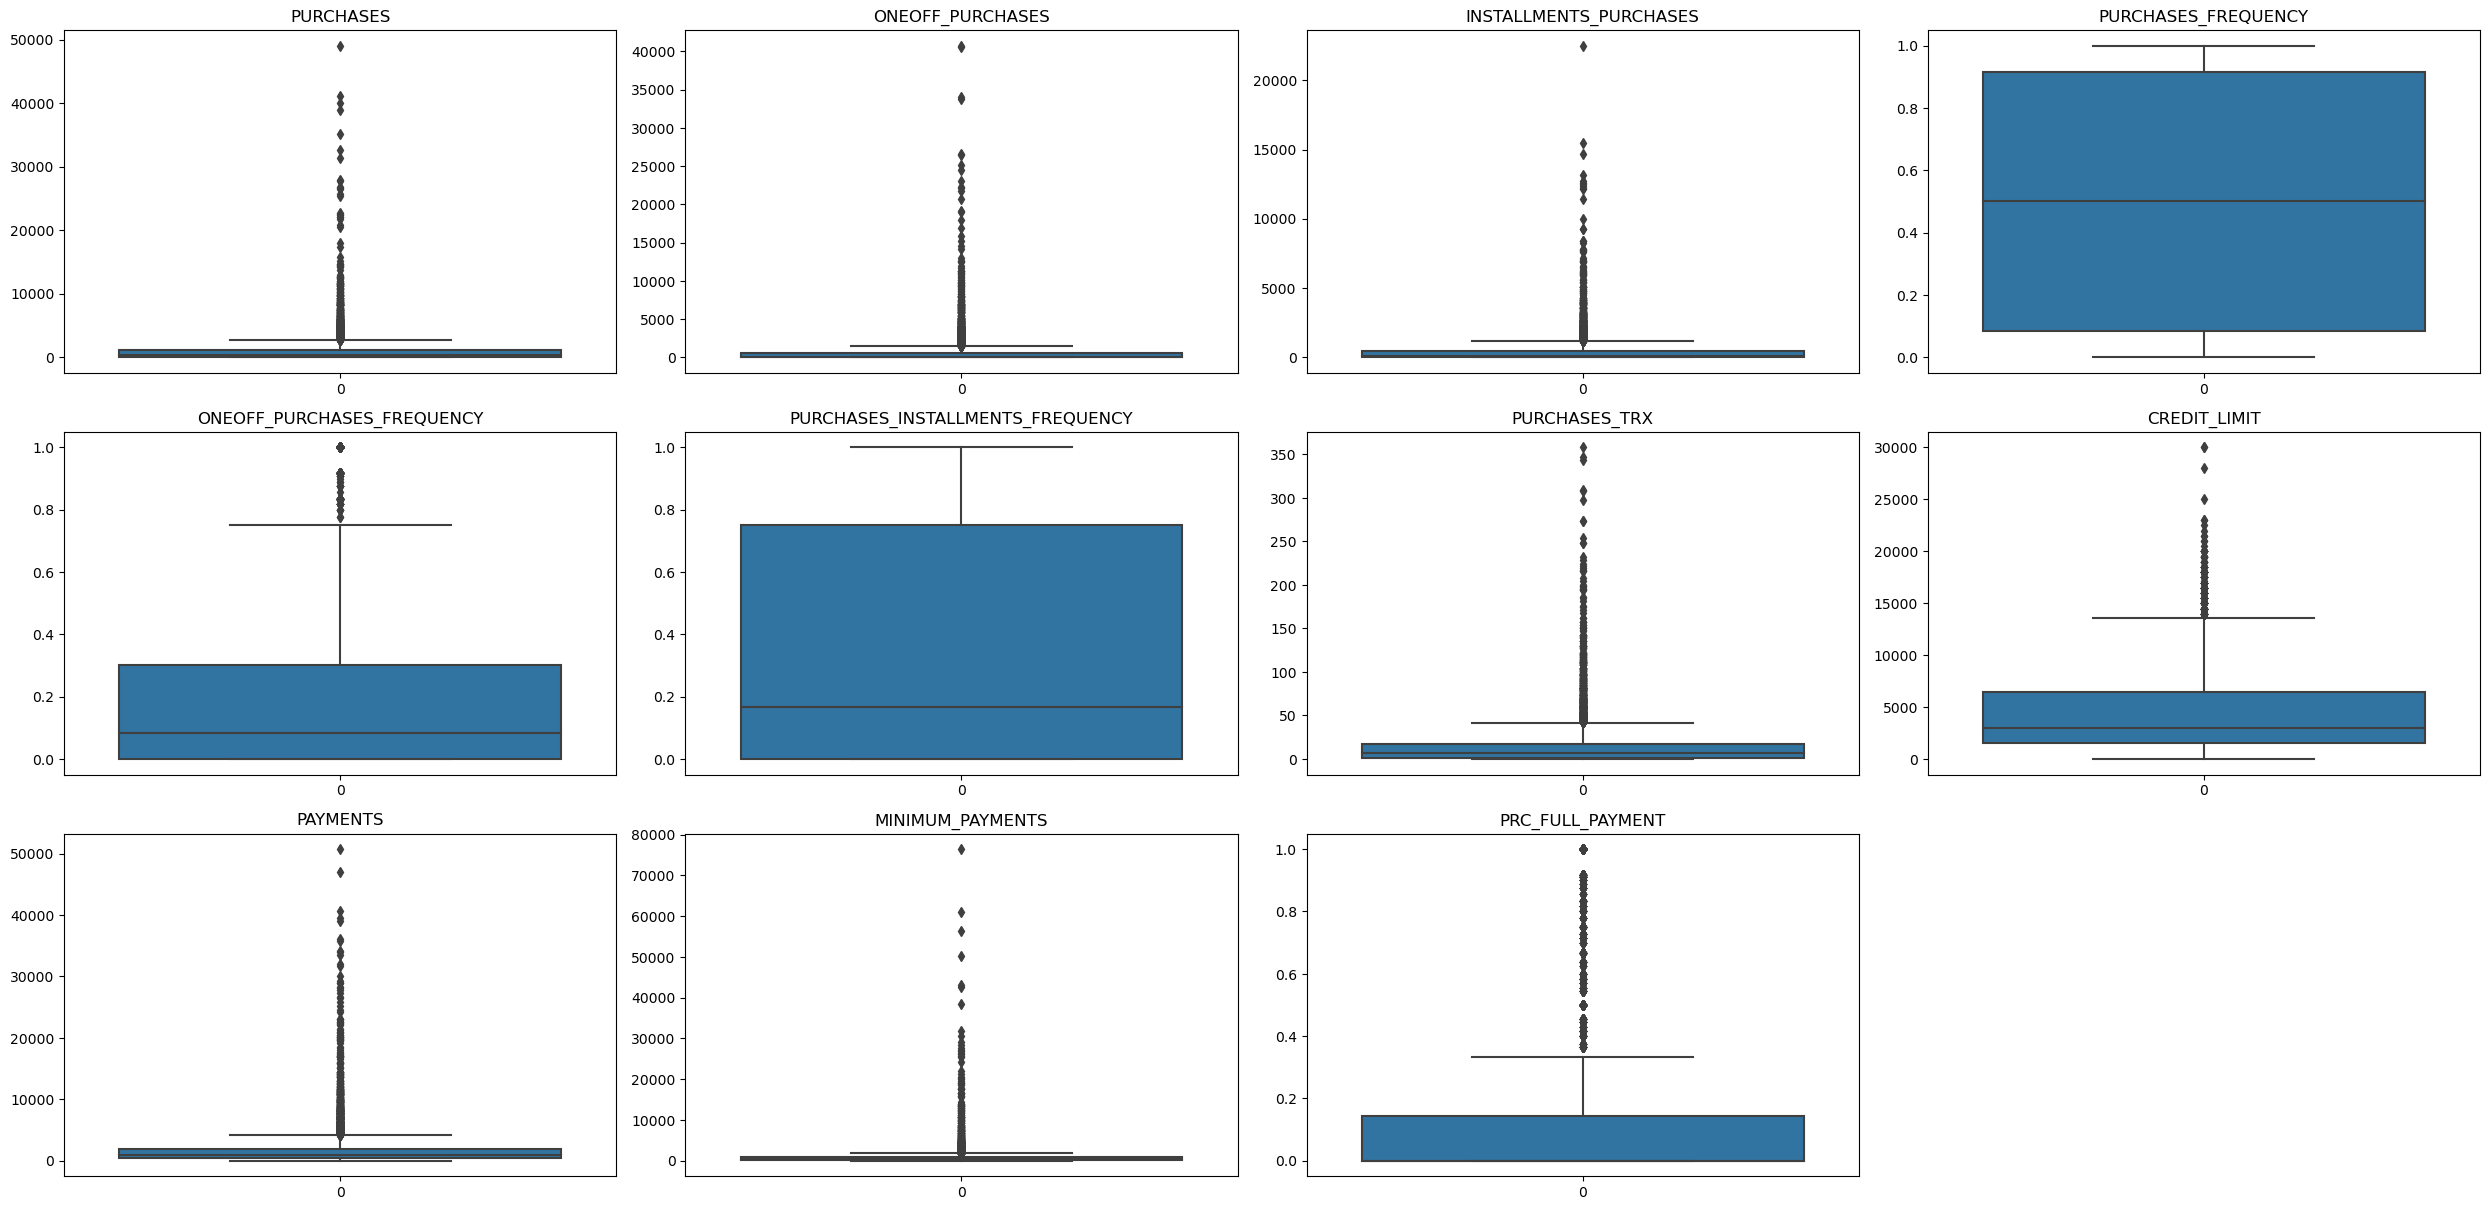

In [12]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(df1.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df1[df1.columns[i]])
    plt.title(df1.columns[i])
    
plt.tight_layout()

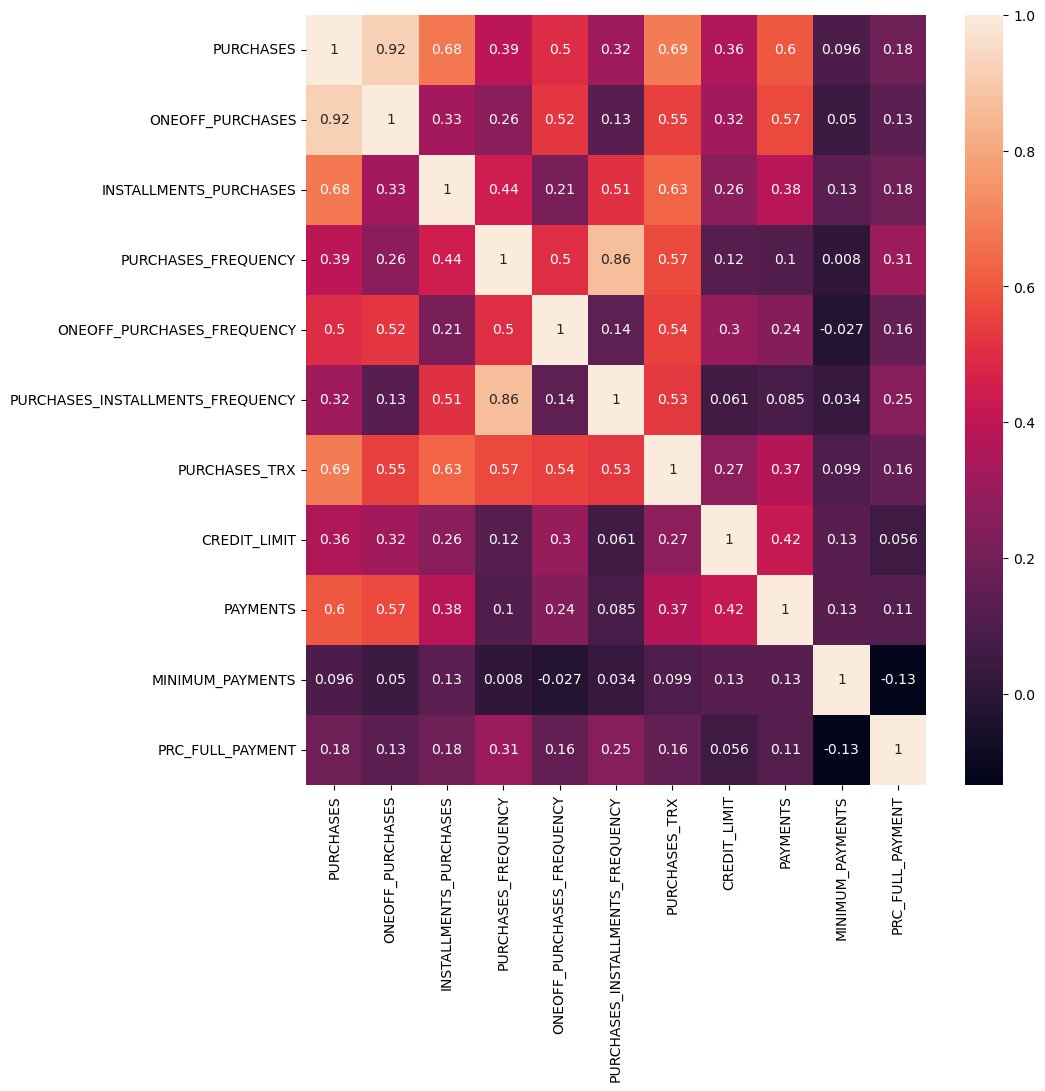

In [13]:
# calculates the correlations
correlation = df1.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(10, 10)
sns.heatmap(correlation, annot=True);

# displays the plot
plt.show()

In [14]:
# Step 1: Feature Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df1)

In [15]:
scaled_columns = pd.DataFrame(data_scaled)
scaled_columns

,0,1,2,3,4,5,6,7,8,9,10
0,0.001945,0.000000,0.004240,0.166667,0.000000,0.083333,0.005587,0.031720,0.003979,0.001826,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232053,0.080893,0.014035,0.222222
2,0.015766,0.018968,0.000000,1.000000,1.000000,0.000000,0.033520,0.248748,0.012264,0.008210,0.000000
3,0.030567,0.036775,0.000000,0.083333,0.083333,0.000000,0.002793,0.248748,0.000000,0.000000,0.000000
4,0.000326,0.000393,0.000000,0.083333,0.083333,0.000000,0.002793,0.038397,0.013374,0.003204,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8944,0.005936,0.000000,0.012939,1.000000,0.000000,0.833333,0.016760,0.031720,0.006419,0.000640,0.500000
8945,0.006118,0.000000,0.013333,1.000000,0.000000,0.833333,0.016760,0.031720,0.005439,0.011215,0.000000
8946,0.002945,0.000000,0.006418,0.833333,0.000000,0.666667,0.013966,0.031720,0.001602,0.001079,0.250000
8947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015025,0.001036,0.000730,0.250000


- As the data spreads in a wide range as from 0 to over 50,000, we applied MinMax Scaler to standardize the values in the table to be ranged in [0,1]

Modeling
- K-MEANS
- DBSCAN
- K-Meoids

Criterias for selecting 3 models

- K-Means Clustering:
  - Simplicity and Speed: K-Means is computationally efficient, especially useful with large datasets. It partitions data into spherical clusters, suitable when clusters are roughly equal in size and density.
  - Best for Globular Clusters: Works well when data has low noise and clusters are compact or round-shaped, like customer groups with similar spending patterns.
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
  - Non-Globular Clusters: DBSCAN handles clusters of arbitrary shapes and varying densities, which is beneficial if some customer segments are densely packed, while others are sparse.
  - Noise Handling: DBSCAN can identify outliers (noise points), which is valuable for spotting high-risk or atypical customers whose spending or payment behaviors deviate significantly from the norm.
- K-Medoids (PAM - Partitioning Around Medoids):
  - Robustness to Noise: K-Medoids, using medoids (actual data points) rather than centroids, is less sensitive to outliers, making it effective for datasets with variability in customer behaviors.
  - Interpretability: Medoids represent actual data points, providing more interpretable clusters. This is helpful when creating customer personas based on central, representative customers in each segment.

K-Means Clustering:

In [16]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [17]:
inertia = []
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(scaled_columns)
    inertia.append(kmeans.inertia_)
    silh.append(silhouette_score(scaled_columns, kmeans.labels_))

  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Lists Initialization:

inertia and silh are initialized as empty lists to store the inertia and silhouette scores for each number of clusters, respectively.

Loop Over Cluster Range:

The for loop iterates over the range of cluster numbers from 2 to 9 (range(2,10)).

K-Means Model: For each iteration, a K-Means model is initialized with n_clusters = i.

Fitting the Model: The model is then fitted to scaled_columns, which is likely the scaled version of your data.

Storing Inertia: The inertia of the fitted model (using kmeans.inertia_) is appended to the inertia list.

Storing Silhouette Score: The silhouette score (computed based on the model's labels) is appended to the silh list, providing insight into the clustering quality at each cluster count.

In [18]:
inertia

[2287.174193985623,
 1714.1539615015388,
 1401.0743730638765,
 1183.4079420570388,
 1017.9853853894773,
 888.785993476161,
 762.2868614911008,
 686.9553262710949]

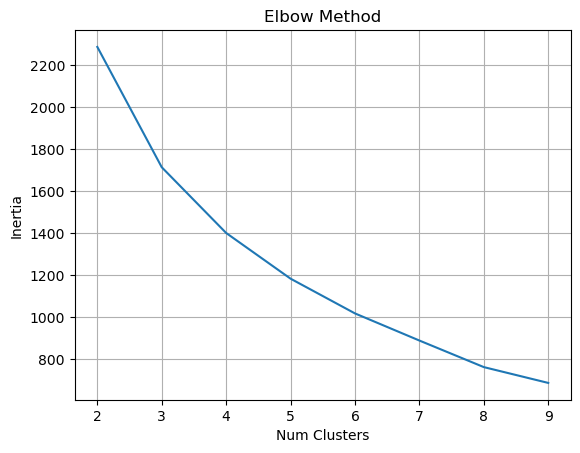

In [19]:
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Evaluation of the Elbow Plot

- The y-axis represents inertia, which decreases as the number of clusters increases. Lower inertia indicates more compact clusters.
- The x-axis shows the number of clusters (ranging from 2 to 9).

Observations
- The curve exhibits a sharp decline in inertia as the number of clusters increases initially, indicating that adding more clusters significantly improves cluster compactness.
- The "elbow" point, where the rate of decrease in inertia slows down, appears to be around 4 clusters. After this point, additional clusters result in only marginal reductions in inertia, suggesting diminishing returns.

Interpretation：
  The optimal number of clusters appears to be 4, as it balances compactness and simplicity. This aligns with the notion of an elbow in the plot, where adding more clusters beyond this point does not substantially improve the model’s performance.

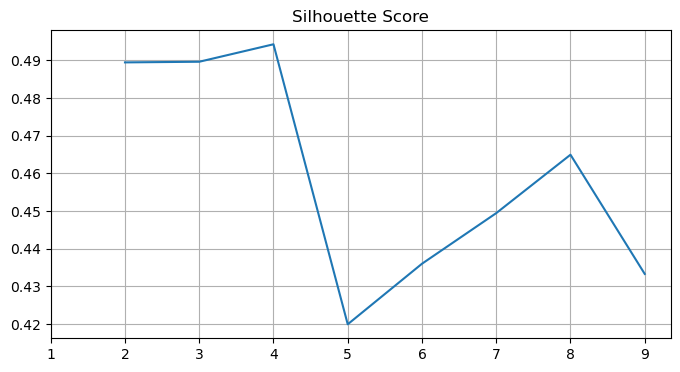

In [21]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

Evaluation of the Silhouette Plot

- Y-axis: Silhouette Score, where higher values indicate better-defined and more separated clusters.
- X-axis: Number of clusters.

Observations
- The highest silhouette score appears at 4 clusters, with a value above 0.50. This suggests that the clusters are well-separated when there are four groups.
- After 4 clusters, the silhouette score decreases significantly, with no consistent improvement as the number of clusters increases. For example, it dips around 5 clusters and reaches its lowest point around 5 clusters, then gradually rises again.
- There is a slight increase after 5 clusters, but the silhouette scores remain relatively low, indicating suboptimal cluster separations for higher cluster numbers.

Interpretation
- The high silhouette score for 4 clusters suggests that a simpler segmentation with four main groups might offer clearer separation. However, if more detailed segmentation is required, choosing 8 clusters may provide a reasonable balance, as it aligns with previous findings from the Elbow Method.
- The fluctuating silhouette scores after 4 clusters imply that the data structure might not strongly support larger numbers of clusters, or that customer segments are less distinct as they are subdivided further.

In [47]:
# fit the model and choose clusters 
kmeans = KMeans(n_clusters=4, random_state=22)
kmeans.fit(scaled_columns)
kmeans_labels = kmeans.labels_

DBSCAN

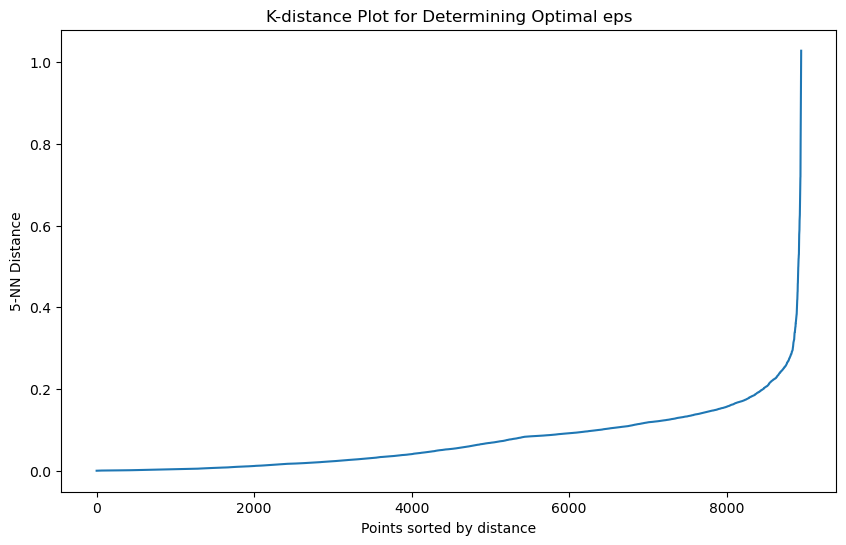

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Set the number of neighbors to min_samples
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data_scaled) 
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sort the distances and plot them
distances = np.sort(distances[:, min_samples - 1])  # Only take the distance to the k-th neighbor
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN Distance")
plt.title("K-distance Plot for Determining Optimal eps")
plt.show()

The K-distance plot helps determine the optimal eps value in DBSCAN by identifying the “elbow” point, which separates dense clusters from sparse regions, optimizing the algorithm’s ability to detect clusters and noise. The diagram illustrates that the optimal eps value near the point where the curve sharply rises is 0.2. It indicates that the transition from dense clusters to sparse regions, which allows DBSCAN to effectively distinguish clusters from noise.

In [23]:
eps = 0.2  
dbscan = DBSCAN(eps=eps,min_samples=6) 

dbscan_model = dbscan.fit(scaled_columns)
dbscan_labels = dbscan_model.labels_


# Check the number of unique clusters
unique_clusters = set(dbscan_labels)
print(f"Number of clusters found: {len(unique_clusters)}")
print(f"Cluster labels: {unique_clusters}")

Number of clusters found: 3
Cluster labels: {0, 1, -1}


Since DBSCAN relies on the density of points to form clusters. The eps value defines how dense a region must be for points to be considered part of the same cluster. By selecting an appropriate eps, DBSCAN can better distinguish between dense regions (clusters) and sparse regions (noise). This helps reduce the inclusion of noise points within clusters and improves clustering accuracy. Therefore, we created a K-distance plot to find the optimal value of eps for the DBSCAN which from the plot the optimal is 0.2.

The parameters used are eps = 0.2 (as determined from the K-distance plot) and min_samples = 6 (this was tuned to make sure DBSCAN has at least two clusters exclude noise). The scatter plot visualizes clusters on the first two principal components, with each point color-coded based on its cluster assignment.


The output at the bottom indicates that three clusters were identified, with labels {0, 1, -1}. Here, -1 denotes noise points (data points that do not belong to any cluster). This result suggests that, with eps = 0.2, DBSCAN recognized a 3 cluster and several points in sparse regions labeled as noise which in cluster -1. This configuration aligns with DBSCAN's purpose of isolating clusters in dense areas while treating isolated points as outliers, effectively distinguishing clusters from noise in the data.

K-Medoids

In [24]:
inertia = []
silh = []

for i in range(2,10):
    kmedoids = KMedoids(n_clusters = i) 
    kmedoids.fit(scaled_columns)
    inertia.append(kmedoids.inertia_)
    silh.append(silhouette_score(scaled_columns, kmedoids.labels_))

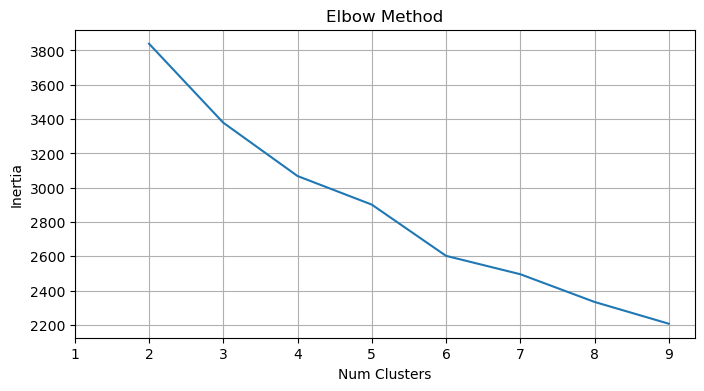

In [25]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,10))
plt.grid()
plt.show()

Inertia represents how tightly the points in a cluster are grouped, with lower inertia indicating more compact clusters.

In this plot, there is a noticeable drop in inertia initially, followed by a slower decline after around 3 clusters. This point of elbow indicates the optimal balance between compact clustering and simplicity, as adding more clusters beyond this point yields minimal improvement. Therefore, 3 clusters is likely an appropriate choice for K-Medoids based on the elbow method, as it achieves a good trade-off between clustering quality and model complexity.

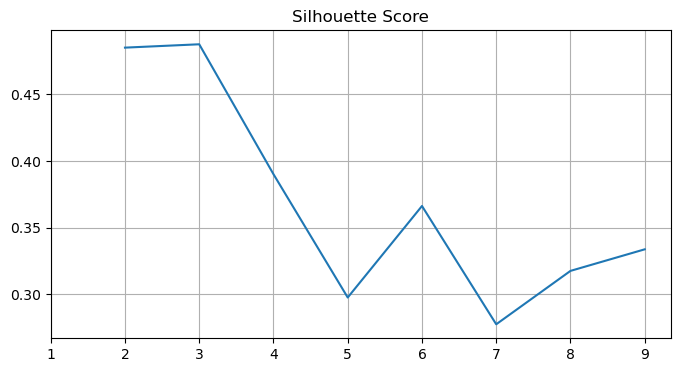

In [26]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In the plot:

The highest Silhouette Score is achieved with 3 clusters (around 0.5), suggesting that this configuration provides the most distinct separation between clusters. The score drops sharply after 3 clusters, with a noticeable decrease at 4 and 5 clusters, indicating less clear separation as more clusters are added. Finally, we select 3 as our number of cluster.

In [27]:
# Final decision on numbers of cluster chosen: 3

kmedoids = KMedoids(n_clusters = 3, random_state=42)
kmedoids.fit(scaled_columns)
kmedoids_labels = kmedoids.labels_

Evaluation

In [28]:
# K-Means silhouette score
kmeans_silhouette = silhouette_score(scaled_columns.iloc[:, :11], kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

# DBSCAN silhouette score
dbscan_silhouette = silhouette_score(scaled_columns.iloc[:, :11], dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# For K-Medoids
kmedoids_silhouette = silhouette_score(scaled_columns.iloc[:, :11], kmedoids_labels)
print("K-Medoids Silhouette Score:", kmedoids_silhouette)

K-Means Silhouette Score: 0.49425077659935657
DBSCAN Silhouette Score: 0.1945810391758006
K-Medoids Silhouette Score: 0.4876732970353098


K-Means: Silhouette Score of 0.494 suggests that the clusters formed are moderately well-defined, with some separation between clusters.

DBSCAN: Silhouette Score of 0.195 is low, indicating poorly defined clusters with significant overlap. This could be due to the algorithm struggling with the density-based nature of the dataset or a high amount of noise that doesn’t fit into clusters.

K-Medoids: Silhouette Score of 0.488 is close to K-Means, which indicates comparable clustering performance. K-Medoids is robust to outliers, so its high score suggests it managed to form well-defined clusters while accounting for atypical customer behaviors.

Summary: Both K-Means and K-Medoids performed similarly and better than DBSCAN, based on silhouette scores. DBSCAN’s low score implies that the data may not be suitable for density-based clustering, or its parameters may need adjustment to improve performance.

In [29]:
# Count of clusters and noise in DBSCAN
unique_clusters_dbscan = pd.Series(dbscan_labels).value_counts()
print("DBSCAN Cluster Distribution:\n", unique_clusters_dbscan)

# Count of clusters in K-Means
unique_clusters_kmeans = pd.Series(kmeans_labels).value_counts()
print("K-Means Cluster Distribution:\n", unique_clusters_kmeans)

# K-Medoids cluster distribution
unique_clusters_kmedoids = pd.Series(kmedoids_labels).value_counts()
print("K-Medoids Cluster Distribution:\n", unique_clusters_kmedoids)

DBSCAN Cluster Distribution:
  0    8619
-1     324
 1       6
Name: count, dtype: int64
K-Means Cluster Distribution:
 1    4613
2    2219
0    1240
3     877
Name: count, dtype: int64
K-Medoids Cluster Distribution:
 2    4525
1    3048
0    1376
Name: count, dtype: int64


DBSCAN:

- Cluster Sizes: The largest cluster (0) has 8619 data points, while the remaining clusters are very small, with sizes 6.
- Noise Points: 324 points were labeled as noise (-1), suggesting that these data points do not fit into any cluster based on DBSCAN’s density criteria.
- Insight: DBSCAN identified a significant number of noise points and small clusters, which may indicate that the data does not have clear density-based separations. This can happen if clusters are not well-defined by density or if DBSCAN’s parameters (like eps and min_samples) are not optimized.

K-Means:

- Cluster Sizes: K-Means  with clusters 4613，2219，1240 and 877，was effective in creating groups that represent major patterns within the dataset. Unlike DBSCAN, which labels some data points as noise, K-Means assigns every point to a cluster. This characteristic is beneficial when the goal is to segment the entire dataset without excluding any points as outliers. Balanced cluster sizes are helpful in applications where equal representation across segments is desirable, such as in customer segmentation, where each group represents a substantial portion of the customer base.

- Insight: K-Means’ balanced cluster sizes indicate that it successfully created distinct customer segments without considering noise, making it suitable for applications where all data points should belong to a group.

K-Medoids:

- Cluster Sizes: Similar to K-Means, with clusters of 4525, 3408, and 1376. This shows that K-Medoids, like K-Means, grouped the data into well-separated clusters.
- Insight: K-Medoids’ clusters are also balanced, and as it is less sensitive to outliers than K-Means, the clustering may be slightly more robust, capturing central tendencies better in each cluster.

Overall Evaluation and Desicion

- K-Means and K-Medoids are both suitable for this dataset due to their moderate silhouette scores and balanced cluster distributions. K-Means might be preferred if computational efficiency is a priority, whereas K-Medoids could be ideal if robustness to outliers is more important.

- DBSCAN did not perform well in this case, likely due to the lack of density-based structure in the data or suboptimal parameters. If identifying outliers is crucial, DBSCAN’s noise detection is beneficial, but further tuning would be necessary.

- Decision: Based on the clustering performance and the structure of the data, K-Means or K-Medoids are recommended for segmenting customer behavior in this dataset, with DBSCAN used primarily for outlier detection rather than main clustering.

In [30]:
print("K-Means Inertia:", kmeans.inertia_)

print("K-Medoids Inertia:", kmedoids.inertia_)

K-Means Inertia: 1401.0771137565519
K-Medoids Inertia: 3378.919282106072


Interpretation:

- Inertia is a measure of how tightly the clusters are formed around the centroids or medoids. Lower inertia values typically indicate more compact clusters. Here, K-Means has a significantly lower inertia compared to K-Medoids, suggesting that K-Means clusters are more compact.
- The K-Means inertia (1401.08) is significantly lower than the K-Medoids inertia (3378.92). This suggests that K-Means clustering resulted in more compact clusters, with data points closer to the cluster centroids. Since K-Means minimizes the sum of squared distances to centroids (using Euclidean distance), it naturally achieves a lower inertia compared to K-Medoids, which minimizes distances to actual data points (medoids).
- K-Means tends to minimize inertia due to its optimization process, which directly minimizes within-cluster variance. K-Medoids does not always produce as low an inertia since it uses medoids (actual data points) as cluster centers, making it more robust to outliers but potentially leading to slightly less compact clusters.

In [31]:
from sklearn.metrics import davies_bouldin_score

# K-Means DBI
kmeans_dbi = davies_bouldin_score(scaled_columns.iloc[:, :11], kmeans_labels)
print("K-Means Davies-Bouldin Index:", kmeans_dbi)

# DBSCAN DBI
dbscan_dbi = davies_bouldin_score(scaled_columns.iloc[:, :11], dbscan_labels)
print("DBSCAN Davies-Bouldin Index:", dbscan_dbi)

# K-Medoids DBI
kmedoids_dbi = davies_bouldin_score(scaled_columns.iloc[:, :11], kmedoids_labels)
print("K-Medoids Davies-Bouldin Index:", kmedoids_dbi)


K-Means Davies-Bouldin Index: 1.01036478280241
DBSCAN Davies-Bouldin Index: 1.8320947353069197
K-Medoids Davies-Bouldin Index: 1.148959570119965


The Davies-Bouldin Index measures the average "similarity ratio" between each cluster and the cluster that is most similar to it. Lower values indicate better-defined clusters, as it suggests that clusters are compact and well-separated from each other. The DBI is generally used to compare clustering models, where a lower DBI signifies better clustering performance.

- K-Means DBI: 1.01
- DBSCAN DBI: 1.83
- K-Medoids DBI: 1.15

Interpretation:

- K-Means (DBI = 1.01):

  - The lowest Davies-Bouldin Index among the three methods, indicating that K-Means formed the most compact and well-separated clusters.
This aligns with K-Means’ tendency to create spherical clusters around centroids, which often leads to lower intra-cluster distances and greater separation between clusters, especially in datasets where spherical clustering structures are appropriate.

- DBSCAN (DBI = 1.83):

  - The highest Davies-Bouldin Index, suggesting that the clusters identified by DBSCAN are less compact or more overlapping compared to those found by K-Means or K-Medoids.
  - This can be expected since DBSCAN clusters are density-based, and it often leaves some points as noise, which can lead to less well-defined boundaries between clusters. Additionally, DBSCAN is effective for data with irregular shapes but may not achieve as compact clusters in this context.

- K-Medoids (DBI = 1.15):

  - The Davies-Bouldin Index for K-Medoids is higher than that of K-Means but lower than DBSCAN, indicating that K-Medoids formed clusters that are somewhat compact and separated, though not as well-defined as K-Means.
  - K-Medoids is robust to outliers and works well for datasets where medoids (actual data points) represent clusters more realistically than centroids, but this typically results in slightly less compact clusters than K-Means.

Summary
- K-Means performs the best in terms of both inertia and DBI, showing compact and well-separated clusters, making it a strong choice for this dataset.
- K-Medoids also performs reasonably well with good DBI, but with higher inertia, suggesting slightly less compact clusters. It is still a good option, especially if robustness to outliers is essential.
- DBSCAN performed poorly in terms of DBI, indicating that it is less suitable for creating well-defined clusters in this case. It may still be useful for detecting noise or outliers but not as the main clustering algorithm.

Final Decision

Given the results from above analysis, K-Means is the recommended algorithm due to its compact, well-separated clusters. K-Medoids could be an alternative if there is a need to manage outliers better, while DBSCAN may serve as a supplementary tool for outlier detection.

K-Means is the best

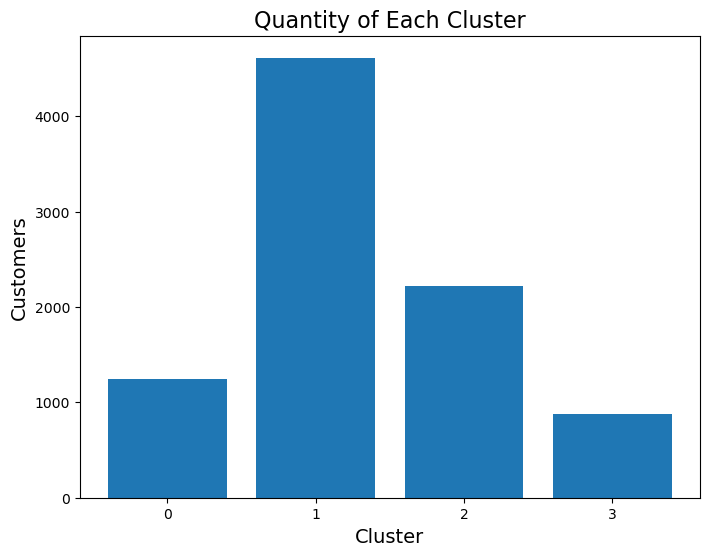

Cluster 0: 1240
Cluster 1: 4613
Cluster 2: 2219
Cluster 3: 877


In [32]:
labels, counts = np.unique(kmeans_labels, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

 Cluster 1 is the largest with 4,613 customers, followed by Cluster 2 with 2,219, Cluster 0 with 1,240, and Cluster 3 as the smallest with 877 customers. This distribution suggests a main segment (Cluster 1) and several smaller, distinct groups, which could help in targeting different customer needs based on segment size.

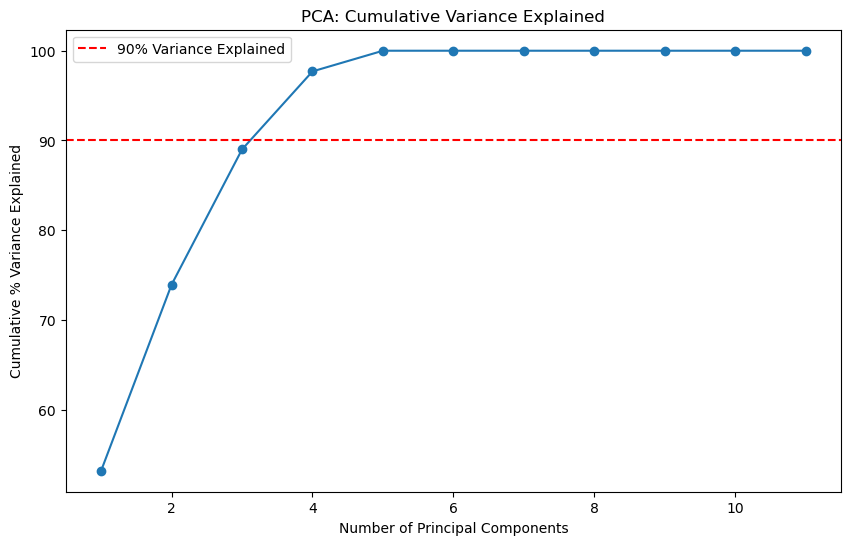

In [33]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=len(df1.columns))
pca.fit(df1)

# Calculate the cumulative variance explained by each component
variance_explained = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative % Variance Explained')
plt.title('PCA: Cumulative Variance Explained')
plt.axhline(y=90, color='r', linestyle='--', label='90% Variance Explained')
plt.legend()
plt.show()

In [34]:
# Use PCA to keep enough components to explain at least 90% of the variance
pca = PCA(n_components=4)  
cluster_pca = pca.fit_transform(scaled_columns)

In [35]:
pca_columns = pd.DataFrame(cluster_pca, columns=[f'PC{i+1}' for i in range(cluster_pca.shape[1])])

pca_columns

,PC1,PC2,PC3,PC4
0,-0.492363,-0.110175,-0.034649,-0.089333
1,-0.610514,-0.012425,0.199910,0.129689
2,0.281026,0.859208,-0.389648,-0.168557
3,-0.575703,0.021734,-0.045598,0.105281
4,-0.583542,-0.005773,-0.038859,-0.076064
...,...,...,...,...
8944,0.667378,-0.303275,0.290554,-0.156604
8945,0.567891,-0.403338,-0.188871,-0.160090
8946,0.394499,-0.287082,0.082687,-0.150457
8947,-0.612635,-0.035296,0.232752,-0.072135


Dimensionality Reduction for Visualization

-	We applied PCA to reduce feature redundancy by combining correlated features into uncorrelated variables. This not only minimizes data overlap but also makes it easier to visualize in fewer dimensions.
-	As we want PCA to capture most of the information in the data, we set a threshold at 90% cumulative variance. From the plot, it indicates that the first four principal components together explained at least 90% of the total variance. So we selected components = 4 for the dimensionality reduction. 

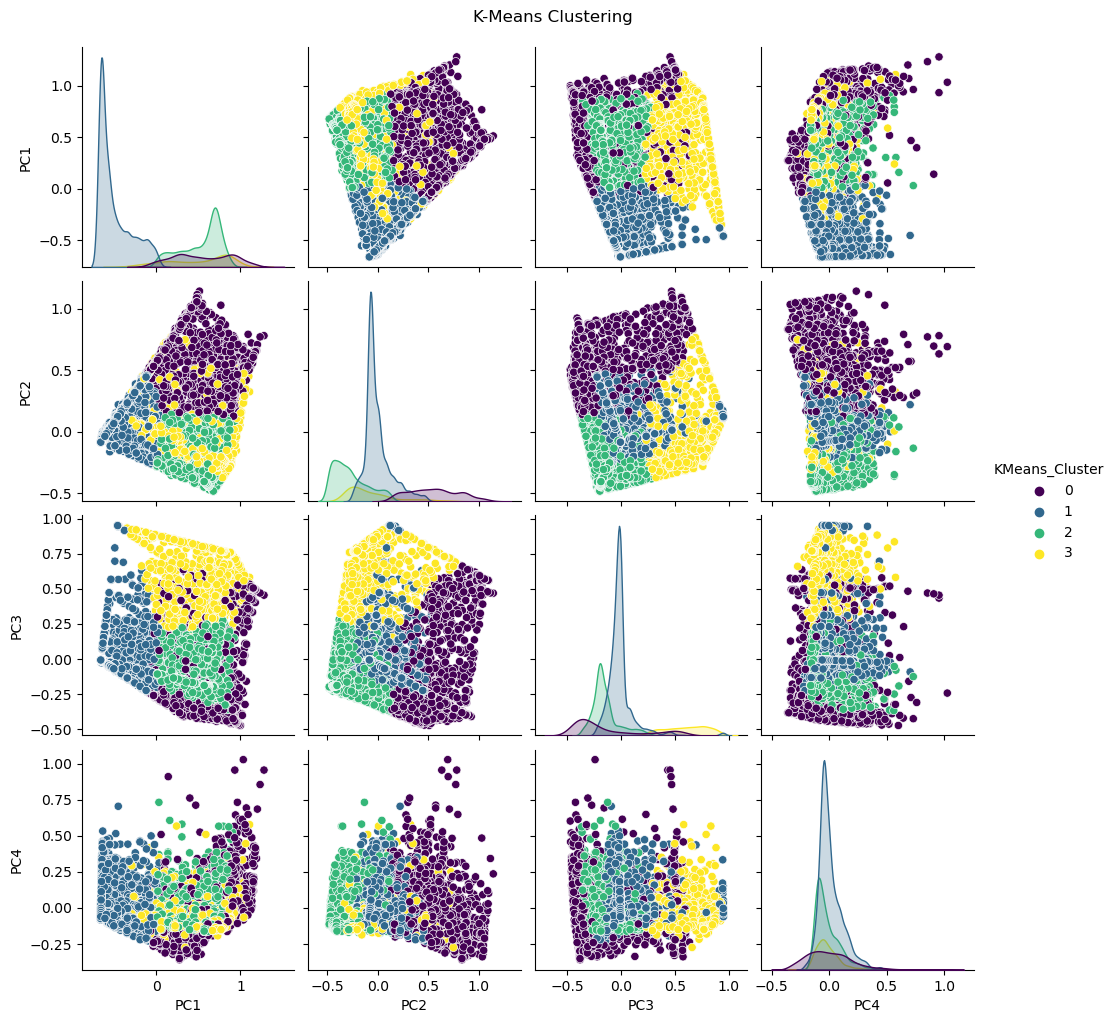

In [36]:
# Adding labels to the PCA DataFrame for visualization
pca_columns['KMeans_Cluster'] = kmeans_labels

# Pair plots for K-Means
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='KMeans_Cluster', palette='viridis')
plt.suptitle("K-Means Clustering", y=1.02)
plt.show()

This pairplot clearly shows the clustering results after dimensionality reduction using PCA. The application of PCA has reduced redundancy in the data and highlighted distinct patterns, allowing for a more straightforward visualization of clusters. Each cluster occupies its own space across the principal components, especially along the first two, demonstrating the effectiveness of PCA in separating groups in a lower-dimensional space. This visualization simplifies the analysis and makes it easier to observe the main differences between clusters.

In the next steps, we will go back to the original data to analyze the characteristics of each cluster in detail. By linking our cluster summary insights to individual data points, we can understand the distinct features that define each group and gain deeper insights into customer behaviors. This will help us determine what makes each cluster unique and how best to target and serve the needs of each segment.

In [38]:
final_data = df1.copy()
final_data['Label'] = kmeans_labels

final_data.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
0,95.40,0.00,95.4,0.166667,0.000000,0.083333,2,1000.0,201.802084,139.509787,0.000000,1
1,0.00,0.00,0.0,0.000000,0.000000,0.000000,0,7000.0,4103.032597,1072.340217,0.222222,1
2,773.17,773.17,0.0,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,0
3,1499.00,1499.00,0.0,0.083333,0.083333,0.000000,1,7500.0,0.000000,0.000000,0.000000,1
4,16.00,16.00,0.0,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,1


We group the final_data DataFrame by Label (clusters) and calculate the mean of each feature within each cluster. This gives us a summarized view of the average values for each feature across clusters, revealing key characteristics of each cluster.

In [39]:
# Calculate mean values of each feature by cluster
cluster_summary = final_data.groupby('Label').mean()

print(cluster_summary)

         PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Label                                                          
0      3304.703637       2510.296960              794.406677   
1       289.774355        237.025860               52.892881   
2      1170.123001        367.883326              802.826246   
3      1080.523044        319.056842              762.286021   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Label                                                    
0                 0.909357                    0.836702   
1                 0.140324                    0.084620   
2                 0.876065                    0.128495   
3                 0.763661                    0.112885   

       PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  \
Label                                                                  
0                              0.472269      43.452419   6800.884897   
1                              0.055352       2.66

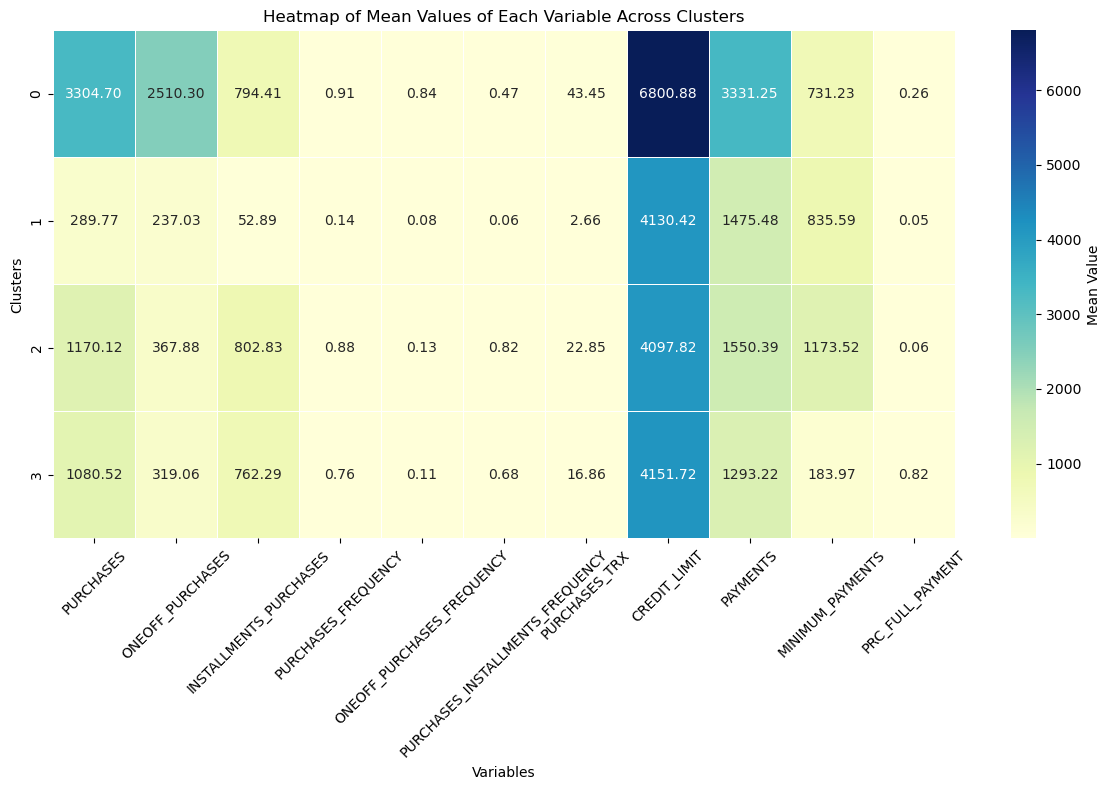

In [42]:
# Assuming `cluster_summary` is a DataFrame containing the mean values of each variable per cluster
# Set the plot size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Mean Value'})

# Add title and labels
plt.title('Heatmap of Mean Values of Each Variable Across Clusters')
plt.xlabel('Variables')
plt.ylabel('Clusters')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

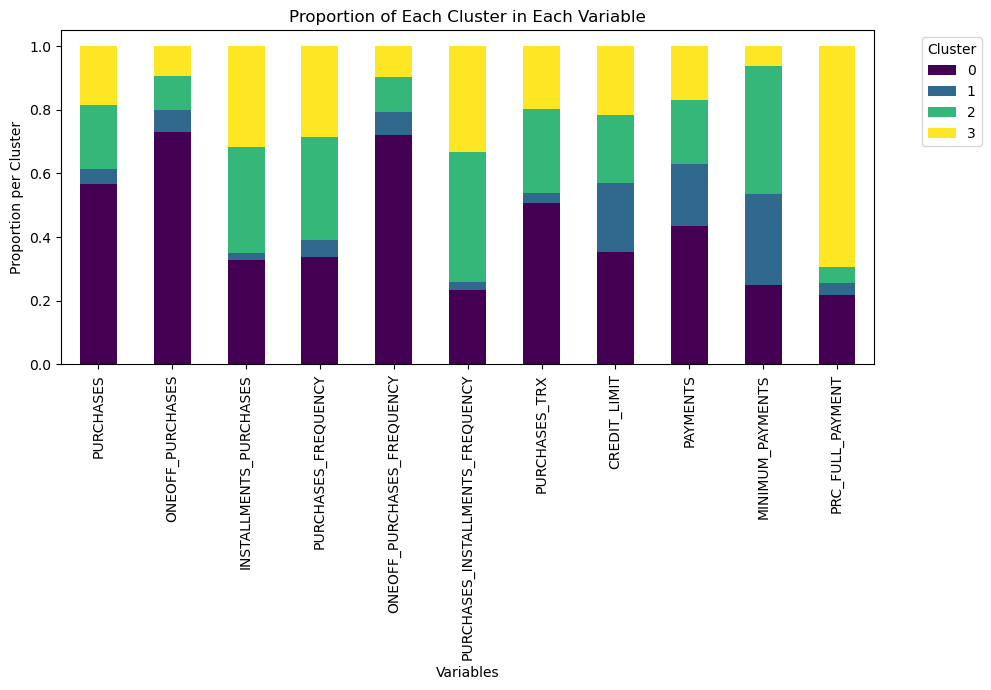

In [43]:
# Normalize the data to show proportions within each variable
cluster_summary_normalized = cluster_summary.div(cluster_summary.sum(axis=0), axis=1)

# Transpose for easier plotting with variables on the x-axis
cluster_summary_normalized = cluster_summary_normalized.T

# Plot the stacked bar chart
ax = cluster_summary_normalized.plot(kind='bar', stacked=True, figsize=(10, 7), colormap="viridis")

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Proportion per Cluster')
plt.title('Proportion of Each Cluster in Each Variable')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

#### Interpreting Clusters

Cluster 0 - High-Spenders with Large Credit Limits

- Purchases & One-Off Purchases: This cluster has the highest values for both PURCHASES (3304.70) and ONEOFF_PURCHASES (2510.30), suggesting that these customers make frequent and significant one-time purchases.
- Credit Limit: They enjoy the highest CREDIT_LIMIT (6800.88), indicating that these are trusted, high-value customers.
- Purchasing Frequency: Both PURCHASES_FREQUENCY (0.91) and ONEOFF_PURCHASES_FREQUENCY (0.84) are relatively high, showing consistent usage of credit for different types of purchases.
- Payment Behavior: They have moderate values for MINIMUM_PAYMENTS (731.23) and a low PRC_FULL_PAYMENT (0.25), suggesting that they tend to carry balances and do not always pay off their credit in full.

  Summary: Cluster 0 represents high-spending, financially engaged customers who utilize significant credit, likely a profitable segment for premium services or rewards programs.

---

Cluster 1 - Low-Engagement, Minimal-Credit Customers

- Purchases: Very low average PURCHASES (289.77) and ONEOFF_PURCHASES (237.03) suggest minimal spending.
- Credit Limit: Lower CREDIT_LIMIT (4130.42) compared to other clusters, indicating limited credit.
- Purchasing and Payment Patterns: Low PURCHASES_FREQUENCY (0.14) and ONEOFF_PURCHASES_FREQUENCY (0.08) confirm infrequent credit usage.
- Minimum Payments: The highest MINIMUM_PAYMENTS (835.59) among clusters, combined with a very low PRC_FULL_PAYMENT (0.05), suggests potential financial strain or risk in meeting payments.

  Summary: Cluster 1 represents low-engagement, low-spending customers who may not be profitable and could benefit from basic financial products or credit counseling.

---

Cluster 2 - Moderate Spenders with Single-Large Purchase Tendency

- One-Off Purchases: High ONEOFF_PURCHASES (367.88) with a moderate CREDIT_LIMIT (4097.82) suggests customers who occasionally make large purchases but don’t have excessive credit.
- Purchase Frequency: Higher PURCHASES_FREQUENCY (0.87) shows more consistent spending behavior.
- Minimum Payments: A high MINIMUM_PAYMENTS (1173.52) and low PRC_FULL_PAYMENT (0.06) suggest they may carry balances.

  Summary: Cluster 2 includes customers with a pattern of moderate, periodic large transactions, potentially suited for mid-level credit products with some guidance on payment management.

---

Cluster 3 - Financially Conservative with High Full Payments

- Purchases: Moderate values for PURCHASES (1080.52) and ONEOFF_PURCHASES (319.06).
- Credit Limit: Average CREDIT_LIMIT (4151.72) compared to the rest.
- Payment Pattern: High PRC_FULL_PAYMENT (0.82) and the lowest MINIMUM_PAYMENTS (183.97) indicate they consistently pay off their balances, suggesting a low-risk, financially disciplined group.

  Summary: Cluster 3 is characterized by financially conservative customers who prefer to pay their balances in full, making them a low-risk group that may value cashback or rewards for full payments.

In [40]:
for i in range(4):
    print('Cluster:', i)
    display(final_data[final_data['Label'] == i].describe())
    print('\n')

Cluster: 0


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.0
mean,3304.703637,2510.296960,794.406677,0.909357,0.836702,0.472269,43.452419,6800.884897,3331.248243,731.229797,0.256063,0.0
std,4294.293050,3504.128599,1391.496465,0.130054,0.170032,0.385786,40.554980,4377.255811,4509.801250,1321.705719,0.355187,0.0
min,8.400000,8.400000,0.000000,0.500000,0.333333,0.000000,5.000000,300.000000,0.000000,0.000000,0.000000,0.0
25%,1118.825000,831.887500,0.000000,0.833333,0.666667,0.000000,18.000000,3500.000000,1038.007203,182.784360,0.000000,0.0
50%,2166.860000,1544.390000,328.350000,1.000000,0.916667,0.428571,30.000000,6000.000000,1947.632085,284.732164,0.000000,0.0
75%,3910.395000,2805.342500,991.175000,1.000000,1.000000,0.833333,53.000000,9000.000000,3807.144033,853.277569,0.454545,0.0
max,49039.570000,40761.250000,15497.190000,1.000000,1.000000,1.000000,358.000000,30000.000000,46930.598240,21235.065300,1.000000,0.0




Cluster: 1


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
count,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.0
mean,289.774355,237.025860,52.892881,0.140324,0.084620,0.055352,2.660308,4130.415033,1475.484468,835.589771,0.045529,1.0
std,764.397295,719.475218,245.976432,0.168978,0.130600,0.115005,5.023680,3329.809881,2615.224443,2131.566362,0.129061,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,317.447893,173.790575,0.000000,1.0
50%,49.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,3000.000000,679.525430,381.780101,0.000000,1.0
75%,311.200000,213.340000,0.000000,0.250000,0.111111,0.000000,4.000000,6000.000000,1542.366508,856.401575,0.000000,1.0
max,22101.780000,22101.780000,12541.000000,0.666667,0.583333,0.454545,186.000000,23000.000000,50721.483360,61031.618600,1.000000,1.0




Cluster: 2


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
count,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.0
mean,1170.123001,367.883326,802.826246,0.876065,0.128495,0.823976,22.853988,4097.823662,1550.392129,1173.523559,0.059520,2.0
std,1450.471894,737.743588,1065.205117,0.155489,0.171804,0.187330,23.245686,3413.010198,2334.765532,3354.096805,0.114385,0.0
min,12.000000,0.000000,12.000000,0.500000,0.000000,0.333333,0.000000,450.000000,0.000000,0.000000,0.000000,2.0
25%,346.240000,0.000000,269.610000,0.750000,0.000000,0.666667,11.000000,1500.000000,396.599455,171.400389,0.000000,2.0
50%,674.300000,0.000000,498.410000,1.000000,0.000000,0.900000,15.000000,3000.000000,869.413166,378.370091,0.000000,2.0
75%,1481.050000,427.490000,977.010000,1.000000,0.250000,1.000000,27.000000,6000.000000,1773.112316,1025.830838,0.083333,2.0
max,22500.000000,9805.730000,22500.000000,1.000000,0.666667,1.000000,347.000000,23000.000000,40627.595240,76406.207520,0.500000,2.0




Cluster: 3


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.0
mean,1080.523044,319.056842,762.286021,0.763661,0.112885,0.675437,16.860889,4151.716769,1293.216227,183.970309,0.816564,3.0
std,1376.728996,775.597417,1014.200685,0.254270,0.198360,0.305429,19.446479,3396.878136,1673.071948,283.992384,0.189535,0.0
min,27.420000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,300.000000,34.401591,18.092319,0.363636,3.0
25%,313.250000,0.000000,246.250000,0.583333,0.000000,0.444444,7.000000,1500.000000,381.479704,128.122144,0.666667,3.0
50%,608.800000,0.000000,460.520000,0.833333,0.000000,0.750000,12.000000,3000.000000,753.224953,155.792859,0.857143,3.0
75%,1293.040000,190.000000,942.340000,1.000000,0.166667,1.000000,19.000000,5500.000000,1515.629124,175.622760,1.000000,3.0
max,14604.870000,6965.060000,12375.000000,1.000000,0.916667,1.000000,232.000000,21500.000000,15246.115940,4553.156050,1.000000,3.0


#### Business Insights/Recommendations 

**Cluster 0 - High-Spenders with Large Credit Limits**

- **Strategy: Premium Rewards Program**
  - **Implementation**: Develop an exclusive, tiered rewards program tailored to high-value customers. This group consists of high-value, frequent spenders who utilize their large credit limits and often carry balances. A premium rewards program aligns well with their spending behavior by offering incentives that encourage continued high engagement. By providing exclusive perks like travel benefits, concierge services, and higher cashback on large purchases, the company appeals to the desires of high-spending customers. Since they already have high usage patterns, premium rewards will reinforce loyalty and increase spending further, making this strategy highly profitable.
  - **Benefits for the Company**: A premium rewards program builds loyalty among high-spenders, encourages higher spending, and enhances the brand's appeal. Since these customers tend to carry balances, increased spending leads to larger balances, which in turn generates more interest income, making this group highly profitable.

---

**Cluster 1 - Low-Engagement, Minimal-Credit Customers**

- **Strategy: Financial Education Program with Small Rewards for Progress**
  - **Implementation**: Launch a financial education program aimed at improving budgeting, debt management, and responsible credit use. Customers in this cluster have low credit engagement and may be facing financial strain, as indicated by high minimum payments and low full payment rates. A financial education program helps address the root of this issue by providing guidance on budgeting and credit management. Small rewards for completing modules and meeting milestones make the program attractive and encourage participation. This strategy is suitable because it not only supports responsible credit usage but also helps reduce the risk of defaults. By investing in these customers’ financial literacy, the company builds goodwill and potentially transforms them into more engaged, stable users.
  - **Benefits for the Company**: This strategy reduces default risk by helping customers build financial skills and manage credit responsibly. The rewards create positive engagement with the credit product, and the education programs strengthen the company’s brand image as supportive and customer-centric, potentially increasing long-term loyalty.

---

**Cluster 2 - Moderate Spenders with Single-Large Purchase Tendency**

- **Strategy: Flexible Installment Payment Plans for Large Purchases**
  - **Implementation**: Offer flexible installment options to allow customers to spread out payments for larger purchases. This cluster includes customers who make occasional large purchases and may prefer flexibility in managing larger expenses. Flexible installment options make it easier for them to make significant purchases without financial strain. By offering interest-free or low-interest payment plans, the company supports this group’s spending habits while making the card more appealing for large purchases. This strategy works well because it not only increases transaction volume but also adds value to the customer experience, potentially encouraging long-term loyalty. Since this group often carries balances, the installment plan also provides a steady source of interest income.
  - **Benefits for the Company**: Flexible installment options increase transaction volume, especially during key shopping seasons. Since these customers tend to carry balances, installment plans also contribute to steady interest income. This approach enhances customer satisfaction by making credit use more manageable, potentially improving retention.

---

**Cluster 3 - Financially Conservative with High Full Payments**

- **Strategy: Rewards for Full Payments with Upsell to Premium Cards**
  - **Implementation**: Launch a reward structure specifically designed for customers who pay their balance in full each month. Customers consistently pay off their balances, indicating a disciplined approach to credit use. Offering rewards for full payments is a natural fit for their financial behavior, as it reinforces responsible usage while providing an added incentive. The upsell to premium cards with perks like travel insurance, extended warranties, and cashback benefits aligns with their cautious yet engaged usage pattern. This strategy is appropriate because it enhances loyalty among low-risk customers and offers the company a chance to increase revenue through premium product adoption. By catering to their disciplined approach with rewards and additional perks, the company strengthens its relationship with this low-risk, valuable segment.
  - **Benefits for the Company**: Encouraging full payment behavior aligns with these customers' financial habits, reducing risk while increasing engagement. Offering premium products provides additional revenue streams from annual fees and adds value to the customer experience, enhancing loyalty and retention for this low-risk, financially stable segment.